In [30]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [31]:
%cd /content/drive/MyDrive/logistic

/content/drive/MyDrive/logistic


In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mpl

In [33]:
traindf = pd.read_csv('/content/drive/MyDrive/logistic/emnist-letters-train.csv', header= None)

In [34]:
train = traindf.to_numpy()
train = train[0:62000,:]
print(train)

[[23.  0.  0. ...  0.  0.  0.]
 [ 7.  0.  0. ...  0.  0.  0.]
 [16.  0.  0. ...  0.  0.  0.]
 ...
 [11.  0.  0. ...  0.  0.  0.]
 [22.  0.  0. ...  0.  0.  0.]
 [25.  0.  0. ...  0.  0.  0.]]


In [35]:
trainX = (train[:, 1:])/255

x0 = np.ones([np.shape(trainX)[0], 1])
trainX = np.concatenate((x0, trainX),axis = 1)
print(np.shape(trainX))

(62000, 785)


In [36]:
trainY = train[:, 0]
uniquech = set(trainY)
logisticY = np.zeros([np.size(trainY), len(uniquech)])
for i in range(np.size(trainY)):
  for j in range(1, len(uniquech)+1):
    if trainY[i] == j:
      logisticY[i,j-1] = 1
print(logisticY)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [37]:
def sigmoid(z):
  return 1/ (1+np.exp(-z))

In [38]:
def grad(X, Y, learning_rate, noofiter):
  row,column = np.shape(X)
  theta = np.zeros([column, len(uniquech)], dtype = int)
  costvalues = []

  for t in range(noofiter):

    z = np.dot(X, theta) 
    y_pred = sigmoid(z)

    cost = (1/(row))*np.sum((-Y*np.log(y_pred)) - ((1-Y)*np.log( 1 - y_pred)))
    costdif = (1/(row))*np.dot(X.T, y_pred - Y)
    theta = theta - learning_rate*costdif
    
    costvalues.append(cost)

    if( t % (noofiter/10) == 0):
      print("Cost after", t , "is :", cost)

  return y_pred, theta, costvalues

In [39]:
noofiter = 3000
ypred, theta, costvalues = grad(X= trainX, Y = logisticY, learning_rate = 0.9, noofiter = noofiter)

Cost after 0 is : 18.02182669455861
Cost after 300 is : 1.9757428123321064
Cost after 600 is : 1.8779689473909127
Cost after 900 is : 1.8319831394504447
Cost after 1200 is : 1.8052814376449635
Cost after 1500 is : 1.7879914868302214
Cost after 1800 is : 1.7759354096567244
Cost after 2100 is : 1.7670441207763505
Cost after 2400 is : 1.7601879744208968
Cost after 2700 is : 1.7547060284399236


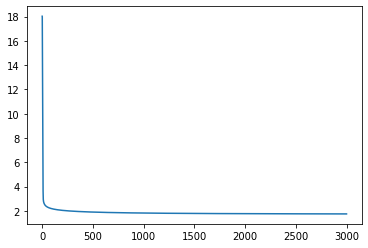

In [40]:
mpl.plot(np.arange(noofiter), costvalues)
mpl.show()

In [41]:
index = np.argmax(ypred, axis=1)
pred = np.zeros(ypred.shape)
for i in range(np.shape(ypred)[0]):
  pred[i][index[i]] = 1

# for i in range(np.shape(ypred)[0]):
#   for j in range(np.shape(ypred)[1]):
#     if ypred[i][j] < 0.5:
#       ypred[i][j] = False
#     else:
#       ypred[i][j] = True
# ypred

In [42]:
prediction = np.zeros([np.size(trainY) , 1], dtype = int)
for i in range(np.shape(ypred)[0]):
  for j in range(np.shape(ypred)[1]):
    if pred[i][j] == 1:
      prediction[i][0] = j + 1

prediction

array([[11],
       [ 7],
       [16],
       ...,
       [11],
       [22],
       [ 6]])

In [43]:
trainY = np.vstack(trainY)
trainY

array([[23.],
       [ 7.],
       [16.],
       ...,
       [11.],
       [22.],
       [25.]])

In [44]:
test = pd.read_csv('/content/drive/MyDrive/logistic/emnist-letters-test.csv', header= None)
test = test.to_numpy()
test = test[:,:]
print(test)

[[ 1  0  0 ...  0  0  0]
 [ 1  0  0 ...  0  0  0]
 [ 1  0  0 ...  0  0  0]
 ...
 [19  0  0 ...  0  0  0]
 [19  0  0 ...  0  0  0]
 [19  0  0 ...  0  0  0]]


In [45]:
testX = (test[:, 1:])/255

x0 = np.ones([np.shape(testX)[0], 1])
testX = np.concatenate((x0, testX),axis = 1)
print((testX))

[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]


In [46]:
testY = test[:, 0]

vecY = np.zeros([np.size(testY), len(uniquech)])
for i in range(np.size(testY)):
  for j in range(1, len(uniquech)+1):
    if testY[i] == j:
      vecY[i,j-1] = 1
print(vecY)

[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [47]:
z = np.dot(testX, theta) 
y_pred = sigmoid(z)

In [48]:
indextest = np.argmax(y_pred, axis=1)
pred = np.zeros(y_pred.shape)
for i in range(np.shape(y_pred)[0]):
  pred[i][indextest[i]] = 1

In [49]:
predictiontest = np.zeros([np.size(testY) , 1], dtype = int)
for i in range(np.shape(pred)[0]):
  for j in range(np.shape(pred)[1]):
    if pred[i][j] == 1:
      predictiontest[i][0] = j + 1

predictiontest

array([[ 5],
       [24],
       [ 1],
       ...,
       [19],
       [10],
       [ 1]])

In [50]:
def accuracy(label, preds):
  truthtable = (label == preds).astype(int)
  truthlist = truthtable.tolist()
  accuracy = (truthlist.count([1]))*(100/(np.shape(preds)[0]))
  print("Accuracy is", accuracy , "%" )
  return accuracy

In [51]:
acc = accuracy(np.vstack(testY), predictiontest)

Accuracy is 69.44594594594595 %
